In [54]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_curve, auc
import itertools
import json

unc_out_prefix = "ss/unc_"
pred_out_prefix = "ss/pred_"
with open(f"{pred_out_prefix}categories.json", "r") as file:
    categories = json.load(file)
max_ens_size = len(categories["S"])+1

category_order = ["S", "M", "L"] + ["SM_duo", "SL_duo"]


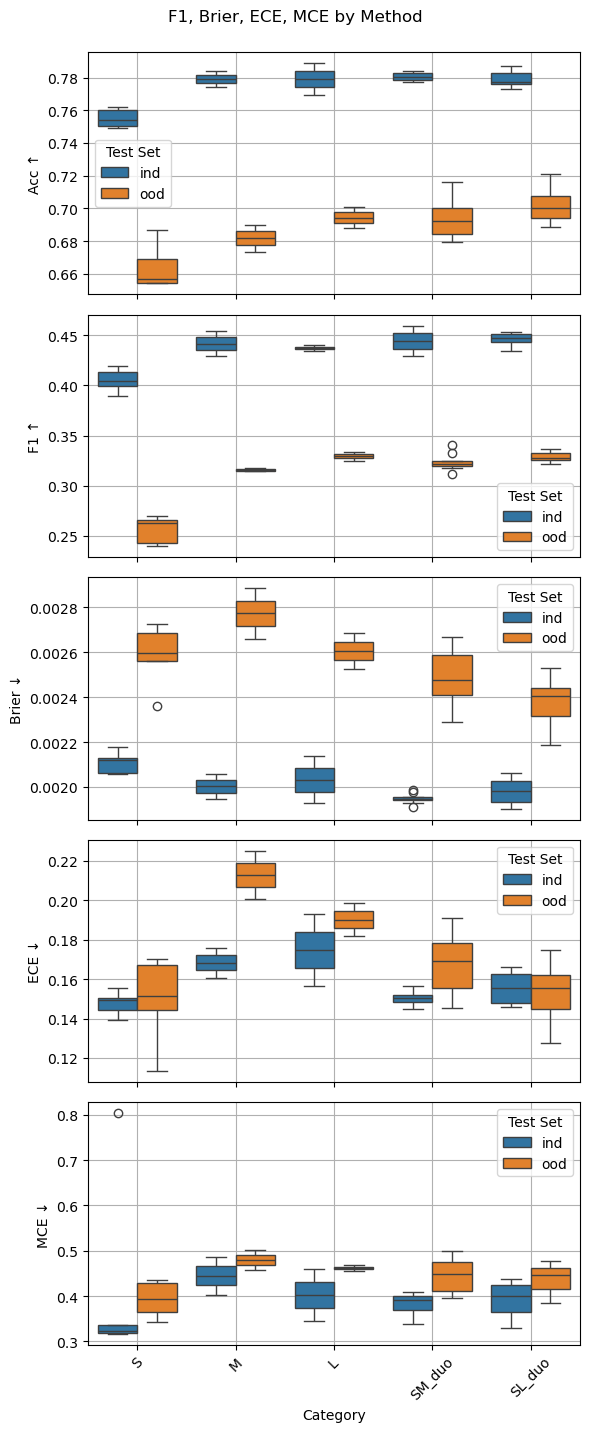

In [55]:
# Plot the metrics
metrics_df = pd.read_csv(f"{pred_out_prefix}metrics.csv")

plt.figure(figsize=(6, 14))
metrics = ['Acc','F1', 'Brier', 'ECE', 'MCE']
arrows = ["↑","↑","↓","↓","↓"]
for i, metric in enumerate(metrics):
    plt.subplot(5, 1, i + 1)
    sns.boxplot(data=metrics_df, x='Category', y=metric, hue='Test Set', order=category_order,)
    plt.ylabel(metric + " " + arrows[i])
    plt.grid(True)
    if i < len(metrics) - 1:
        plt.xlabel('')  # Remove x-label for all plots except the last one
        plt.tick_params(labelbottom=False)  # Hide x-ticks and x-tick labels
    else:
        plt.xlabel('Category')  # Set x-label for the last plot
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("F1, Brier, ECE, MCE by Method",y=1.02)
plt.show()

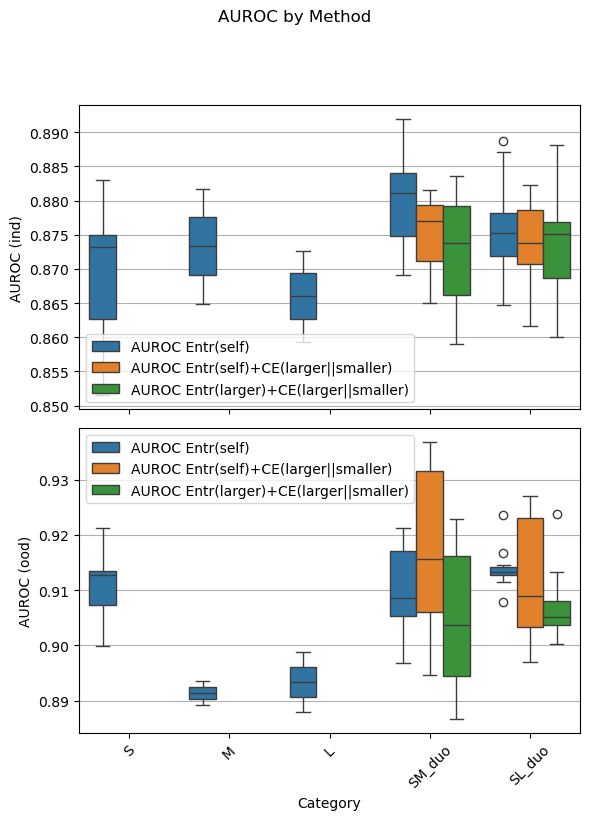

In [56]:
# Load the AUROC results dataframe
auroc_df = pd.read_csv(f"{unc_out_prefix}auroc_results.csv")

# Melt the dataframe to have a single column for AUROC values and another for the metric type
auroc_melted_df = auroc_df.melt(id_vars=['Category', 'Model', 'Test Set'],
                                value_vars=["AUROC Entr(self)",
                                            "AUROC Entr(self)+CE(larger||smaller)",
                                            "AUROC Entr(larger)+CE(larger||smaller)"],
                                var_name='Metric', value_name='AUROC Value')

# Set up the plot
plt.figure(figsize=(6, 8))

# Filter data for ind and ood
auroc_df_ind = auroc_melted_df[auroc_melted_df['Test Set'] == 'ind']
auroc_df_ood = auroc_melted_df[auroc_melted_df['Test Set'] == 'ood']

# Add the overall title
plt.suptitle("AUROC by Method", y=1.02)

# Create subplots for ind and ood
for i, (data, title) in enumerate(zip([auroc_df_ind, auroc_df_ood], ['ind', 'ood'])):
    plt.subplot(2, 1, i + 1)
    plt.grid(True)
    sns.boxplot(data=data, x='Category', y='AUROC Value', hue='Metric', order=category_order)
    plt.ylabel(f'AUROC ({title})')
    if i < 1:
        plt.xlabel('')  # Remove x-label for the first plot
        plt.tick_params(labelbottom=False)  # Hide x-ticks and x-tick labels
    else:
        plt.xlabel('Category')  # Set x-label for the second plot
    plt.xticks(rotation=45)
    plt.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle
plt.show()

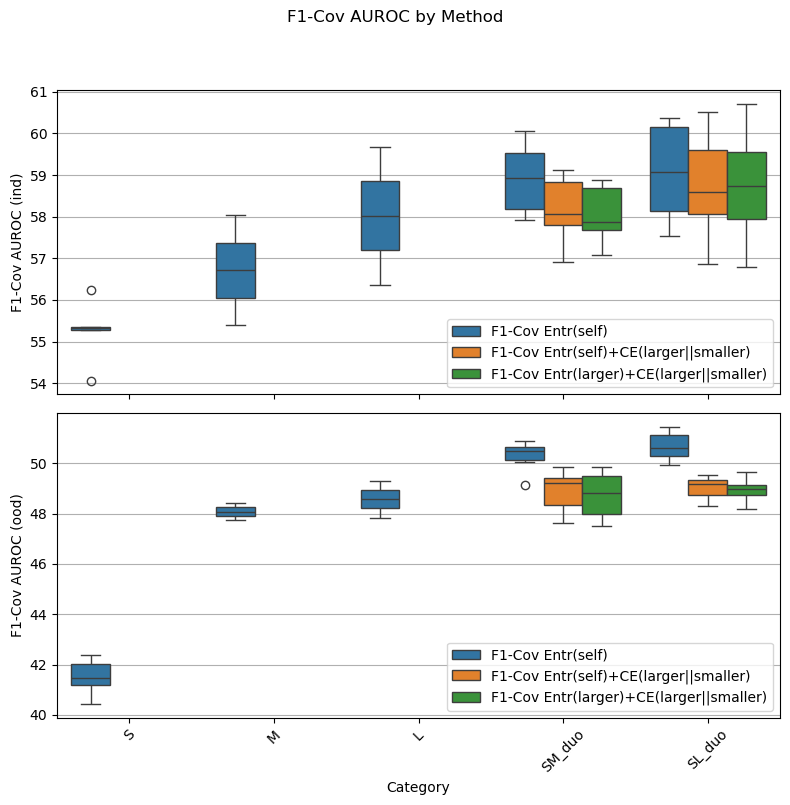

In [57]:
# Load the F1-Coverage AUROC results dataframe
f1_cov_df = pd.read_csv(f"{unc_out_prefix}f1_cov_auc_results.csv")

# Melt the dataframe to have a single column for F1-Cov AUROC values and another for the metric type
f1_cov_melted_df = f1_cov_df.melt(id_vars=['Category', 'Model', 'Test Set'],
                                  value_vars=["F1-Cov Entr(self)", 
                                              "F1-Cov Entr(self)+CE(larger||smaller)",
                                              "F1-Cov Entr(larger)+CE(larger||smaller)"],
                                  var_name='Metric', value_name='AUROC Value')

# Set up the plot
plt.figure(figsize=(8, 8))

# Filter data for ind and ood
f1_cov_df_ind = f1_cov_melted_df[f1_cov_melted_df['Test Set'] == 'ind']
f1_cov_df_ood = f1_cov_melted_df[f1_cov_melted_df['Test Set'] == 'ood']

# Add the overall title
plt.suptitle("F1-Cov AUROC by Method", y=1)

# Create subplots for ind and ood
for i, (data, title) in enumerate(zip([f1_cov_df_ind, f1_cov_df_ood], ['ind', 'ood'])):
    plt.subplot(2, 1, i + 1)
    plt.grid(True)
    sns.boxplot(data=data, x='Category', y='AUROC Value', hue='Metric', order=category_order)
    plt.ylabel(f'F1-Cov AUROC ({title})')
    if i < 1:
        plt.xlabel('')  # Remove x-label for the first plot
        plt.tick_params(labelbottom=False)  # Hide x-ticks and x-tick labels
    else:
        plt.xlabel('Category')  # Set x-label for the second plot
    plt.xticks(rotation=45)
    plt.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle
plt.show()

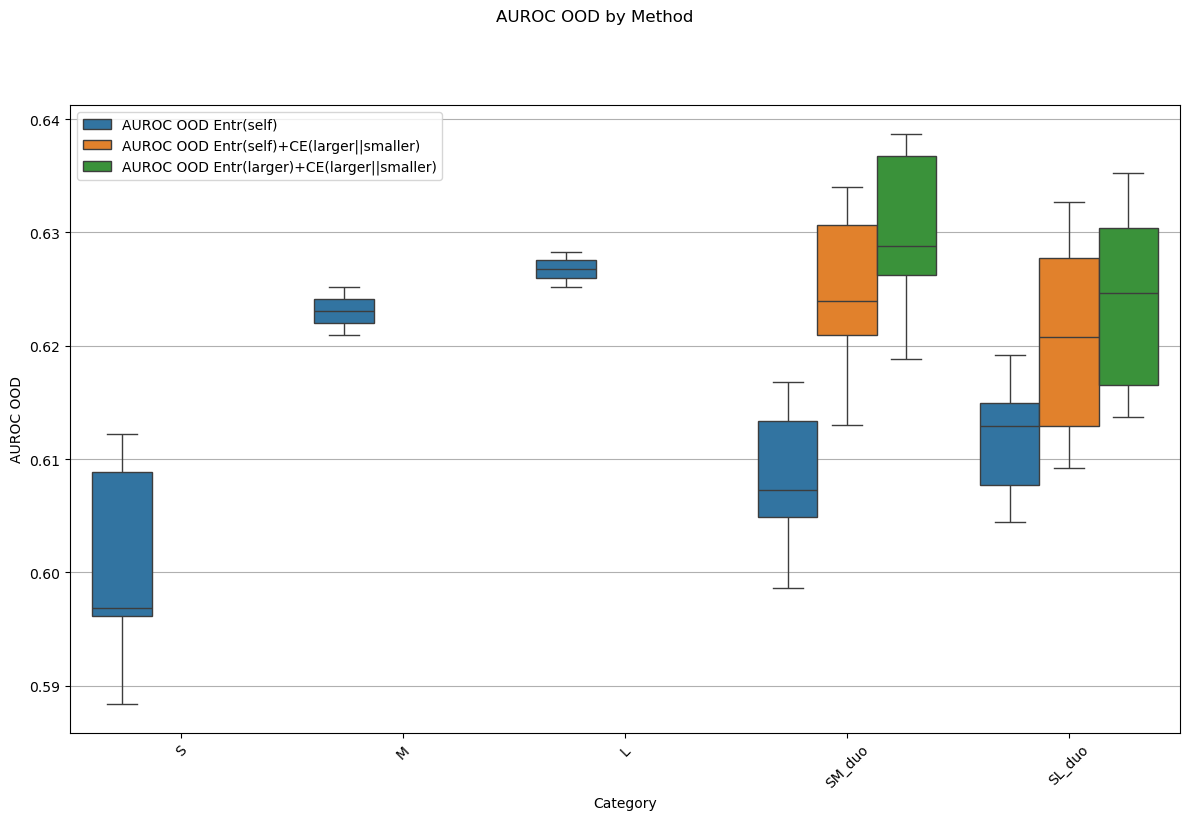

In [60]:
# Load the AUROC OOD results dataframe
auroc_ood_df = pd.read_csv(f"{unc_out_prefix}auroc_ood_results.csv")

# Melt the dataframe to have a single column for AUROC values and another for the metric type
auroc_ood_melted_df = auroc_ood_df.melt(id_vars=['Category', 'Model', 'Test Set'],
                                        value_vars=["AUROC OOD Entr(self)",
                                                    "AUROC OOD Entr(self)+CE(larger||smaller)",
                                                    "AUROC OOD Entr(larger)+CE(larger||smaller)"],
                                        var_name='Metric', value_name='AUROC Value')


# Set up the plot
plt.figure(figsize=(12, 8))

# Filter data for combined test set
auroc_ood_df_combined = auroc_ood_melted_df[auroc_ood_melted_df['Test Set'] == 'combined']

# Add the overall title
plt.suptitle("AUROC OOD by Method", y=1.02)
plt.grid(True)

# Create subplots for ind and ood
sns.boxplot(data=auroc_ood_df_combined, x='Category', y='AUROC Value', hue='Metric', order=category_order)
plt.ylabel('AUROC OOD')
plt.xlabel('Category')  # Set x-label for the plot
plt.xticks(rotation=45)
plt.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle
plt.show()